In [1]:
import torch
import numpy as np

import os
os.chdir('..')
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from evaluate import evaluate_model, pp_output
import instance_generator as ig
import torch_converter as tc
import evaluate as ev
from util import Dataset

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:0


In [13]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(9, 7, train_num, rng, **er_config),
        *ig.sample_instances(9, 7, train_num, rng, **ba_config),
        *ig.sample_instances(9, 7, train_num, rng, **geom_config),
    ]

test_instances = [
        *ig.sample_instances(9, 7, test_num, rng, **er_config),
        *ig.sample_instances(9, 7, test_num, rng, **ba_config),
        *ig.sample_instances(9, 7, test_num, rng, **geom_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

KeyboardInterrupt: 

In [7]:
_, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

0.10291066506606346


Training:   4%|▍         | 1/25 [00:02<01:05,  2.75s/Epochs]

TEST LOSS: 0.06727086007595062


Training:   8%|▊         | 2/25 [00:04<00:53,  2.34s/Epochs]

0.0639278085572676
0.04505072483092988


Training:  12%|█▏        | 3/25 [00:07<00:56,  2.55s/Epochs]

TEST LOSS: 0.03116420842707157


Training:  16%|█▌        | 4/25 [00:09<00:48,  2.29s/Epochs]

0.03660079889135872
0.03242848244834279


Training:  20%|██        | 5/25 [00:11<00:47,  2.36s/Epochs]

TEST LOSS: 0.024624736979603767


Training:  24%|██▍       | 6/25 [00:13<00:41,  2.19s/Epochs]

0.029672764421951388
0.02628691123884558


Training:  28%|██▊       | 7/25 [00:16<00:41,  2.29s/Epochs]

TEST LOSS: 0.021705593913793564


Training:  32%|███▏      | 8/25 [00:18<00:36,  2.17s/Epochs]

0.025080816877101335
0.022262447272486652


Training:  36%|███▌      | 9/25 [00:20<00:36,  2.31s/Epochs]

TEST LOSS: 0.016465285792946815


Training:  40%|████      | 10/25 [00:22<00:32,  2.13s/Epochs]

0.02086506172309856
0.019566667544693665


Training:  44%|████▍     | 11/25 [00:25<00:32,  2.29s/Epochs]

TEST LOSS: 0.015860730782151222


Training:  48%|████▊     | 12/25 [00:27<00:29,  2.25s/Epochs]

0.01898238259678627
0.017794555082345592


Training:  52%|█████▏    | 13/25 [00:30<00:28,  2.38s/Epochs]

TEST LOSS: 0.013727412559092045


Training:  56%|█████▌    | 14/25 [00:31<00:24,  2.19s/Epochs]

0.016856952022303157
0.016472969990168434


Training:  60%|██████    | 15/25 [00:34<00:23,  2.36s/Epochs]

TEST LOSS: 0.013300866819918156


Training:  64%|██████▍   | 16/25 [00:36<00:20,  2.30s/Epochs]

0.015285684607773629
0.015309341834840196


Training:  68%|██████▊   | 17/25 [00:39<00:19,  2.44s/Epochs]

TEST LOSS: 0.011798766441643238


Training:  72%|███████▏  | 18/25 [00:41<00:15,  2.26s/Epochs]

0.014936636793959006
0.014485554334422559


Training:  76%|███████▌  | 19/25 [00:43<00:14,  2.36s/Epochs]

TEST LOSS: 0.011897599324584007


Training:  80%|████████  | 20/25 [00:45<00:11,  2.22s/Epochs]

0.013873385055170905
0.014044516210776365


Training:  84%|████████▍ | 21/25 [00:48<00:09,  2.32s/Epochs]

TEST LOSS: 0.010904124937951565


Training:  88%|████████▊ | 22/25 [00:50<00:06,  2.21s/Epochs]

0.013700027833997215
0.01332170740029764


Training:  92%|█████████▏| 23/25 [00:52<00:04,  2.31s/Epochs]

TEST LOSS: 0.01019977405667305


Training:  96%|█████████▌| 24/25 [00:54<00:02,  2.16s/Epochs]

0.012718850244957152
0.012588007239188022


Training: 100%|██████████| 25/25 [00:57<00:00,  2.30s/Epochs]

TEST LOSS: 0.00998975895345211


In [12]:
save(GNN, args, 'GNN3')

In [ ]:
GNN, args = load('test_GNN', device)

In [11]:
seed = np.random.randint(0, 500000)
(m, n) = (8, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 10, rng, **config)

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

pp_output(ratios2, _, show_log=False)

(array([0]), array([50]))
-- Competitive ratios --
GNN: 0.944
Greedy: 0.9943


# Pivot to feature-generated graphs

In [18]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': False
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': False
}
feat_config = {
    'graph_type': 'FEAT',
    'q': 0.8
}
# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# },
# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 3,
#     'eps': 0.3
# }

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **er_config),
        *ig.sample_instances(8, 8, train_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]

test_instances = [
        *ig.sample_instances(8, 8, test_num, rng, **er_config),
        *ig.sample_instances(8, 8, test_num, rng, **ba_config),
        *ig.sample_instances(8, 8, test_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [19]:
_, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]/home/alexhay/.local/lib/python3.10/site-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


0.216412558531422


Training:   4%|▍         | 1/25 [00:02<01:01,  2.57s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.10128790885210037


Training:   8%|▊         | 2/25 [00:04<00:47,  2.08s/Epochs]

0.09256535050144185
0.07926292092518761


Training:  12%|█▏        | 3/25 [00:06<00:45,  2.09s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.06324652582406998


Training:  16%|█▌        | 4/25 [00:08<00:41,  2.00s/Epochs]

0.07263191766620813
0.0642011449981414


Training:  20%|██        | 5/25 [00:10<00:42,  2.13s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.06447113305330276


Training:  24%|██▍       | 6/25 [00:12<00:38,  2.00s/Epochs]

0.06020695346754017
0.056659023082168386


Training:  28%|██▊       | 7/25 [00:14<00:36,  2.05s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.045477285981178284


Training:  32%|███▏      | 8/25 [00:16<00:33,  1.97s/Epochs]

0.05246881195770928
0.04800134085440661


Training:  36%|███▌      | 9/25 [00:18<00:33,  2.09s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.04087202996015549


Training:  40%|████      | 10/25 [00:20<00:29,  1.97s/Epochs]

0.045906446493369134
0.04426115654306869


Training:  44%|████▍     | 11/25 [00:22<00:27,  1.99s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.04362134262919426


Training:  48%|████▊     | 12/25 [00:24<00:24,  1.89s/Epochs]

0.04157762580381429
0.03978340752870316


Training:  52%|█████▏    | 13/25 [00:26<00:24,  2.01s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.035783711820840836


Training:  56%|█████▌    | 14/25 [00:28<00:21,  1.96s/Epochs]

0.04060459146384068
0.03583838258358651


Training:  60%|██████    | 15/25 [00:30<00:20,  2.02s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.03206406161189079


Training:  64%|██████▍   | 16/25 [00:31<00:17,  1.90s/Epochs]

0.034300419263486745
0.03407504647436333


Training:  68%|██████▊   | 17/25 [00:34<00:16,  2.02s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.02948780730366707


Training:  72%|███████▏  | 18/25 [00:35<00:13,  1.91s/Epochs]

0.034456737253135826
0.03418224645254484


Training:  76%|███████▌  | 19/25 [00:38<00:11,  1.98s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.03665899857878685


Training:  80%|████████  | 20/25 [00:39<00:09,  1.89s/Epochs]

0.03223841373580022
0.031161202602598765


Training:  84%|████████▍ | 21/25 [00:42<00:08,  2.04s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.03164001926779747


Training:  88%|████████▊ | 22/25 [00:43<00:05,  1.92s/Epochs]

0.03186174503991771
0.03061017804475868


Training:  92%|█████████▏| 23/25 [00:46<00:04,  2.01s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.030817564576864243


Training:  96%|█████████▌| 24/25 [00:47<00:01,  1.92s/Epochs]

0.03031321534704421
0.030467601856108837


Training: 100%|██████████| 25/25 [00:50<00:00,  2.01s/Epochs]

TEST ACCURACY: 0.0
TEST LOSS: 0.025801772251725197


In [20]:
seed = np.random.randint(0, 500000)
(m, n) = (32, 16)
config = {
    'graph_type': 'FEAT',
    'q': 0.75
}
# config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# }

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios2 = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

pp_output(ratios2, _, show_log=False)

-- Competitive ratios --
GNN: 0.9791
Greedy: 0.9501


In [8]:
num_trials = 50
node_configs = [(x, 16) for x in np.arange(4, 64, 4)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    # {
    #     'graph_type': 'ER',
    #     'p': 0.75,
    #     'weighted': False
    # },
    # {
    #     'graph_type': 'BA',
    #     'ba_param': 4,
    #     'weighted': False
    # },
    {
        'graph_type': 'PART',
        'p': 0.5,
        'size': 4,
        'eps': 0.1
    },
    {
        'graph_type': 'PART',
        'p': 0.5,
        'size': 3,
        'eps': 0.3
    }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['graph_type']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )


        data[graph_config['graph_type']].append(np.array(
            [
                gnn_learned_ratios,
                greedy_ratios
            ]
        ))

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75]
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (4, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (8, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (12, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (16, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (20, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (24, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (28, 16)
{'graph_type': 'PART', 'p': 0.5, 'size': 4, 'eps': 0.1} (32, 16)


KeyboardInterrupt: 

In [24]:
num_trials = 50
node_configs = [(x, 16) for x in np.arange(4, 64, 4)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    {
    'graph_type': 'FEAT',
    'q': 0.1
    },
    {
    'graph_type': 'FEAT',
    'q': 0.25
    },
    {
    'graph_type': 'FEAT',
    'q': 0.5
    },
    {
    'graph_type': 'FEAT',
    'q': 0.75
    },
    {
    'graph_type': 'FEAT',
    'q': 0.9
    }
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )


        data[graph_config['q']].append(np.array(
            [
                gnn_learned_ratios,
                greedy_ratios
            ]
        ))

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75]
{'graph_type': 'FEAT', 'q': 0.1} (4, 16)
{'graph_type': 'FEAT', 'q': 0.1} (8, 16)
{'graph_type': 'FEAT', 'q': 0.1} (12, 16)
{'graph_type': 'FEAT', 'q': 0.1} (16, 16)
{'graph_type': 'FEAT', 'q': 0.1} (20, 16)
{'graph_type': 'FEAT', 'q': 0.1} (24, 16)
{'graph_type': 'FEAT', 'q': 0.1} (28, 16)
{'graph_type': 'FEAT', 'q': 0.1} (32, 16)
{'graph_type': 'FEAT', 'q': 0.1} (36, 16)
{'graph_type': 'FEAT', 'q': 0.1} (40, 16)
{'graph_type': 'FEAT', 'q': 0.1} (44, 16)
{'graph_type': 'FEAT', 'q': 0.1} (48, 16)
{'graph_type': 'FEAT', 'q': 0.1} (52, 16)
{'graph_type': 'FEAT', 'q': 0.1} (56, 16)
{'graph_type': 'FEAT', 'q': 0.1} (60, 16)
{'graph_type': 'FEAT', 'q': 0.25} (4, 16)
{'graph_type': 'FEAT', 'q': 0.25} (8, 16)
{'graph_type': 'FEAT', 'q': 0.25} (12, 16)
{'graph_type': 'FEAT', 'q': 0.25} (16, 16)
{'graph_type': 'FEAT', 'q': 0.25} (20, 16)
{'graph_type': 'FEAT', 'q': 0.25} (24, 16)
{'graph_type': 'FEAT', 'q': 0.25

PART


ValueError: x and y must have same first dimension, but have shapes (15,) and (30,)

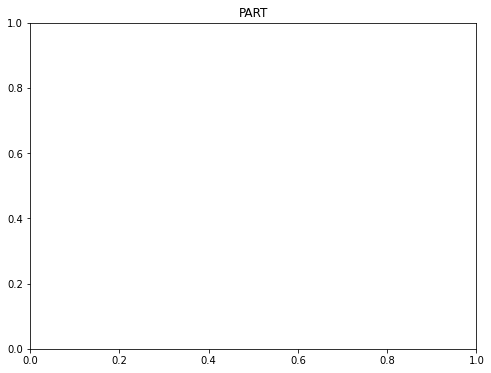

In [20]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for graph_type, comp_ratios in data.items():
    greedy_avg_ratios = []
    gnn_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())

    print(graph_type)
    fig = plt.figure(figsize=(8,6))
    plt.title(graph_type)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.show()


FEAT_0.1


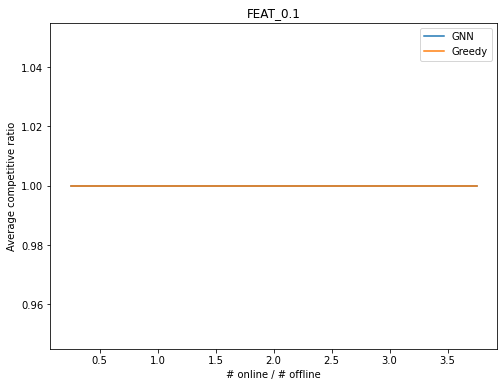

In [23]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for q, comp_ratios in data.items():
    greedy_avg_ratios = []
    gnn_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())

    # title = f"PART_size_{size}"
    title = f"FEAT_{q}"
    print(title)
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/{title}.png")
    plt.show()
